# **National Health and Nutrition Examination Survey (NHANES) 2022-2023**

Link to the data used in this assignment: [NHANES 2021-2023](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2021-2023)

## ✔︎ _**Steps Taken Prior to Performing the Inferential Analysis**_

### 1. Downloaded the applicable data files from NHANES to my laptop.
### 2. Uploaded the necessary data files for each [question](https://github.com/raqssoriano/nhanes_inferential_2023?tab=readme-ov-file#inferential-analysis) to be answered through the inferential analysis.
### 3. I familiarized myself with the [NHANES data variables](https://github.com/raqssoriano/nhanes_inferential_2023?tab=readme-ov-file#dataset-overview) to be used for the analysis.
### 4. Using Python in **Google Colab**, I installed the necessary packages to successfully run the scripts for the inferential analysis.
### 5. I performed the necessary data cleaning, which included recoding, removing certain values, and dropping specific rows/columns as needed.

In [154]:
# Load the necessary data file

import pandas as pd


demographics = pd.read_sas('/content/DEMO_L.XPT', format='xport')
demographics

bp = pd.read_sas('/content/BPXO_L.XPT', format='xport')
bp

vit_d = pd.read_sas('/content/VID_L.XPT', format='xport')
vit_d

hep_b = pd.read_sas('/content/HEPB_S_L.XPT', format='xport')
hep_b

nephro_uro = pd.read_sas('/content/KIQ_U_L.XPT', format='xport')
nephro_uro

p_activity = pd.read_sas('/content/PAQ_L.XPT', format='xport')
p_activity

weight = pd.read_sas('/content/WHQ_L.XPT', format='xport')
weight


,SEQN,WHD010,WHD020,WHD050,WHQ070
0,130378.0,71.0,190.0,200.0,1.0
1,130379.0,70.0,220.0,220.0,2.0
2,130380.0,60.0,150.0,165.0,1.0
3,130384.0,68.0,204.0,212.0,1.0
4,130385.0,70.0,240.0,240.0,2.0
...,...,...,...,...,...
8496,142305.0,61.0,137.0,134.0,2.0
8497,142307.0,61.0,206.0,235.0,1.0
8498,142308.0,69.0,174.0,180.0,1.0
8499,142309.0,69.0,200.0,170.0,2.0


### 5.1 Recoding some key variables (data file) prior to performing the analysis as instructed.

In [155]:
# Recoding the key variables--Marital Status (Married & Not Married)

demographics['DMDMARTZ'] = demographics['DMDMARTZ'].replace({1: 'Married', 2: 'Not Married', 3: 'Not Married'}).fillna('Unknown')
print(demographics['DMDMARTZ'])


0            Married
1            Married
2            Married
3            Unknown
4            Unknown
            ...     
11928        Unknown
11929    Not Married
11930        Married
11931    Not Married
11932        Married
Name: DMDMARTZ, Length: 11933, dtype: object


In [156]:
# Recoding the key variables--Education Level (Bachelor’s or Higher vs. Less than Bachelor’s)

demographics['DMDEDUC2'] = demographics['DMDEDUC2'].replace({1: 'Less than Highschool or Less than Bachelors', 2: 'Less than Highschool or Less than Bachelors', 3: 'High School Graduate or Less than Bachelors', 4: 'Some College or Less than Bachelors', 5: 'College Graduate or Bachelors or Higher'}).fillna('Unknown')
print(demographics['DMDEDUC2'])


0            College Graduate or Bachelors or Higher
1            College Graduate or Bachelors or Higher
2        High School Graduate or Less than Bachelors
3                                            Unknown
4                                            Unknown
                            ...                     
11928                                        Unknown
11929        College Graduate or Bachelors or Higher
11930            Some College or Less than Bachelors
11931            Some College or Less than Bachelors
11932    High School Graduate or Less than Bachelors
Name: DMDEDUC2, Length: 11933, dtype: object


In [157]:
# Recoding the key variables--Hep B Antibodies (two levels)

hep_b = hep_b['LBXHBS'].replace({1: 'Positive', 2: 'Negative', 3: 'Negative'}).fillna('Unknown')
print(hep_b)


0       Negative
1       Negative
2       Negative
3        Unknown
4       Negative
          ...   
8606     Unknown
8607    Negative
8608     Unknown
8609    Positive
8610    Negative
Name: LBXHBS, Length: 8611, dtype: object


In [158]:
# Recoding the key variables--Weak/Failing Kidneys

nephro_uro['KIQ022'] = nephro_uro['KIQ022'].replace({1: 'Yes', 2: 'No', 'Missing': 'Unknown'}).fillna('Unknown')
print(nephro_uro['KIQ022'])

0        No
1        No
2        No
3        No
4        No
       ... 
7804     No
7805     No
7806     No
7807     No
7808    Yes
Name: KIQ022, Length: 7809, dtype: object


### 5.2 Cleaned the data file (key variables) prior to performing the analysis as instructed.

In [159]:
# Data cleaning - Marital Status

marital_status = demographics[['SEQN', 'DMDMARTZ']]
marital_status['SEQN'] = marital_status['SEQN'].astype(str)
marital_status['DMDMARTZ'] = marital_status['DMDMARTZ'].astype(str)
marital_status.dtypes

print(marital_status)

           SEQN     DMDMARTZ
0      130378.0      Married
1      130379.0      Married
2      130380.0      Married
3      130381.0      Unknown
4      130382.0      Unknown
...         ...          ...
11928  142306.0      Unknown
11929  142307.0  Not Married
11930  142308.0      Married
11931  142309.0  Not Married
11932  142310.0      Married

[11933 rows x 2 columns]


<ipython-input-159-89b4d82aa22d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital_status['SEQN'] = marital_status['SEQN'].astype(str)
<ipython-input-159-89b4d82aa22d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital_status['DMDMARTZ'] = marital_status['DMDMARTZ'].astype(str)


In [160]:
# Data cleaning - Education Level

educ = demographics[['SEQN', 'DMDEDUC2']]
educ['SEQN'] = educ['SEQN'].astype(str)
educ['DMDEDUC2'] = educ['DMDEDUC2'].astype(str)
educ.dtypes

print(educ)

           SEQN                                     DMDEDUC2
0      130378.0      College Graduate or Bachelors or Higher
1      130379.0      College Graduate or Bachelors or Higher
2      130380.0  High School Graduate or Less than Bachelors
3      130381.0                                      Unknown
4      130382.0                                      Unknown
...         ...                                          ...
11928  142306.0                                      Unknown
11929  142307.0      College Graduate or Bachelors or Higher
11930  142308.0          Some College or Less than Bachelors
11931  142309.0          Some College or Less than Bachelors
11932  142310.0  High School Graduate or Less than Bachelors

[11933 rows x 2 columns]


<ipython-input-160-8acdb2134c99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  educ['SEQN'] = educ['SEQN'].astype(str)
<ipython-input-160-8acdb2134c99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  educ['DMDEDUC2'] = educ['DMDEDUC2'].astype(str)


In [161]:
# Data cleaning - Age in Years

age_years = demographics[['SEQN', 'RIDAGEYR']]
age_years['SEQN'] = age_years['SEQN'].astype(str)
age_years['RIDAGEYR'] = age_years['RIDAGEYR'].astype(str)
age_years.dtypes

print(age_years)

           SEQN RIDAGEYR
0      130378.0     43.0
1      130379.0     66.0
2      130380.0     44.0
3      130381.0      5.0
4      130382.0      2.0
...         ...      ...
11928  142306.0      9.0
11929  142307.0     49.0
11930  142308.0     50.0
11931  142309.0     40.0
11932  142310.0     80.0

[11933 rows x 2 columns]


<ipython-input-161-71037e29a21e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_years['SEQN'] = age_years['SEQN'].astype(str)
<ipython-input-161-71037e29a21e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_years['RIDAGEYR'] = age_years['RIDAGEYR'].astype(str)


In [162]:
# Data cleaning - Systolic Blood Pressure (SBP)

sbp = bp[['SEQN', 'BPXOSY3']]
sbp['SEQN'] = sbp['SEQN'].astype(str)
sbp['BPXOSY3'] = sbp['BPXOSY3'].astype(str)
sbp.dtypes

print(sbp)


          SEQN BPXOSY3
0     130378.0   132.0
1     130379.0   113.0
2     130380.0   104.0
3     130386.0   115.0
4     130387.0   145.0
...        ...     ...
7796  142306.0     nan
7797  142307.0   131.0
7798  142308.0   112.0
7799  142309.0   128.0
7800  142310.0   129.0

[7801 rows x 2 columns]


<ipython-input-162-9ffc03fb21eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbp['SEQN'] = sbp['SEQN'].astype(str)
<ipython-input-162-9ffc03fb21eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbp['BPXOSY3'] = sbp['BPXOSY3'].astype(str)


In [163]:
# Data cleaning - Diastolic Blood Pressure (DBP)

dbp = bp[['SEQN', 'BPXODI3']]
dbp['SEQN'] = dbp['SEQN'].astype(str)
dbp['BPXODI3'] = dbp['BPXODI3'].astype(str)
dbp.dtypes

print(sbp)

          SEQN BPXOSY3
0     130378.0   132.0
1     130379.0   113.0
2     130380.0   104.0
3     130386.0   115.0
4     130387.0   145.0
...        ...     ...
7796  142306.0     nan
7797  142307.0   131.0
7798  142308.0   112.0
7799  142309.0   128.0
7800  142310.0   129.0

[7801 rows x 2 columns]


<ipython-input-163-2be22774ab62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbp['SEQN'] = dbp['SEQN'].astype(str)
<ipython-input-163-2be22774ab62>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbp['BPXODI3'] = dbp['BPXODI3'].astype(str)


In [164]:
# Data cleaning - Vitamin D (VitD)

vit_d = vit_d[['SEQN', 'LBDVD2LC']]
vit_d['SEQN'] = vit_d['SEQN'].astype(str)
vit_d['LBDVD2LC'] = vit_d['LBDVD2LC'].astype(str)
vit_d.dtypes

vit_d

<ipython-input-164-afbdc4e35afd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vit_d['SEQN'] = vit_d['SEQN'].astype(str)
<ipython-input-164-afbdc4e35afd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vit_d['LBDVD2LC'] = vit_d['LBDVD2LC'].astype(str)


,SEQN,LBDVD2LC
0,130378.0,1.0
1,130379.0,1.0
2,130380.0,1.0
3,130381.0,nan
4,130382.0,nan
...,...,...
8722,142306.0,nan
8723,142307.0,1.0
8724,142308.0,nan
8725,142309.0,1.0


### 5.3 Cleaning the necessary key variables. **Removing 7777, 9999, and Null values** as instructed.

In [165]:
# Data Cleaning - Mins Sedentary Activity (To Remove 7777, 9999, and Null)

p_activity = p_activity[~p_activity['PAD680'].isin([7777, 9999, pd.NA])] # this will select rows where the values 7777, 9999, and null are not present. (pd.NA ➝ handles null values)
p_activity['PAD680']


,PAD680
0,360.0
1,480.0
2,240.0
3,60.0
4,180.0
...,...
8148,480.0
8149,480.0
8150,600.0
8151,240.0


In [166]:
# Data Cleaning - Self-Reported Weight (To Remove 7777, 9999, and Null)

weight = weight[~weight['WHD020'].isin([7777, 9999, pd.NA])] # this will select rows where the values 7777, 9999, and null are not present. (pd.NA ➝ handles null values)
weight['WHD020']

,WHD020
0,190.0
1,220.0
2,150.0
3,204.0
4,240.0
...,...
8496,137.0
8497,206.0
8498,174.0
8499,200.0


In [167]:
# Data Cleaning - Education Level (To Remove 7 and 9 values)

educ = educ[~educ['DMDEDUC2'].isin(['9'])]
educ['DMDEDUC2']

,DMDEDUC2
0,College Graduate or Bachelors or Higher
1,College Graduate or Bachelors or Higher
2,High School Graduate or Less than Bachelors
3,Unknown
4,Unknown
...,...
11928,Unknown
11929,College Graduate or Bachelors or Higher
11930,Some College or Less than Bachelors
11931,Some College or Less than Bachelors


## ✔︎ _**The Inferential Analysis**_

### Below are the 5 research questions that need to be answered, along with the process taken to accomplish the analysis.

## **Question 1**

### `Is there an association between marital status (married or not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?`

*   `DMDMARTZ` (marital status) - categorical
*   `DMDEDUC2` (education level) - categorical
*   Type of Statistical Test used: **`Chi-Square`** (analyzes the relationship between two categorical key variables)













###  **Answer:**

#### There is a **significant** association between marital status and education level.

## **Analysis:**

In [168]:
# Import additional package to help analyze the necessary data

from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Create a contingency table

contingency_table = pd.crosstab(demographics['DMDMARTZ'], demographics['DMDEDUC2'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square test

stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test Statistic: {stat}, p-value: {p_value}")
print("Expected Frequencies:")
print(expected)

# Interpretation

if p_value > 0.05:
    print("\nThere is no significant association between marital status and education level.")
else:
    print("\nThere is a significant association between marital status and education level.")



Contingency Table:
DMDEDUC2     9.0  College Graduate or Bachelors or Higher  \
DMDMARTZ                                                    
77.0           0                                        2   
99.0           0                                        2   
Married        2                                     1631   
Not Married    9                                      990   
Unknown        0                                        0   

DMDEDUC2     High School Graduate or Less than Bachelors  \
DMDMARTZ                                                   
77.0                                                   1   
99.0                                                   0   
Married                                              842   
Not Married                                          905   
Unknown                                                1   

DMDEDUC2     Less than Highschool or Less than Bachelors  \
DMDMARTZ                                                   
77.0        

In [169]:
# Data capture - Marital Status

marital_status = demographics[['SEQN', 'DMDMARTZ']]
marital_status['SEQN'] = marital_status['SEQN'].astype(str)
marital_status['DMDMARTZ'] = marital_status['DMDMARTZ'].astype(str)
marital_status.dtypes

listin = ['1', '2']
marital_status = marital_status[marital_status['DMDMARTZ'].isin(listin)]

marital_status['DMDMARTZ'] = marital_status['DMDMARTZ'].replace('1', 'Married')
marital_status['DMDMARTZ'] = marital_status['DMDMARTZ'].replace('2', 'Not Married')

chisquare_demo = marital_status


<ipython-input-169-129507288f40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital_status['SEQN'] = marital_status['SEQN'].astype(str)
<ipython-input-169-129507288f40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital_status['DMDMARTZ'] = marital_status['DMDMARTZ'].astype(str)


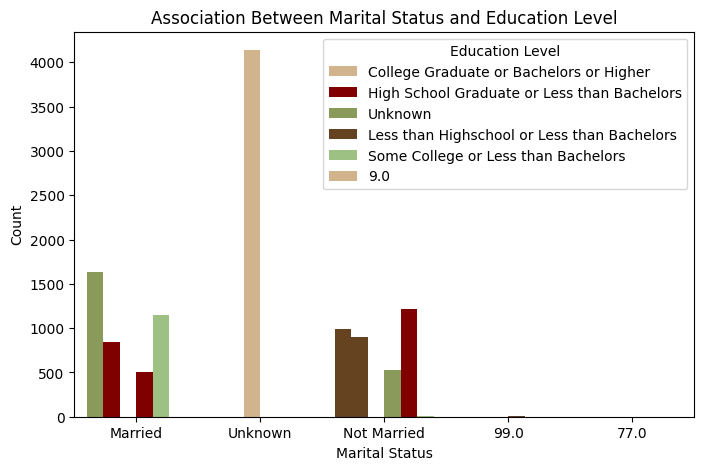

In [170]:
# Rename the columns for the purpose of data visualization

demographics = demographics.rename(columns={'DMDMARTZ': 'Marital Status'})
demographics = demographics.rename(columns={'DMDEDUC2': 'Education Level'})

# Create a data visualization for question 1

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=demographics, x='Marital Status', hue='Education Level')

# just to change the colors to avoid confusion
colors = ['#8A9A5B', '#654321', '#9DC183', '#D2B48C', '#800000']
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i % len(colors)])

plt.title('Association Between Marital Status and Education Level')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Education Level', loc='upper right')


## **Question 2**

### `Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?`

*   `DMDMARTZ` (marital status) - Independent Variable (IV)
*   `PAD680` (sedentary behavior time) - Dependent Variable (DV)
*   Type of Statistical Test used: **`T-test`** (compares the means of a continuous two key variables)




###  **Answer:**

#### There is **no significant** difference in the sedentary behavior time between those individuals who are married and those who are not married.

## **Analysis:**

In [ ]:
from scipy.stats import ttest_ind

# Merge the marital status info into the p_activity data frame

merged = pd.merge(p_activity, marital_status, on='SEQN', how='left')

# Filter physical activity data frame using the original 'DMDMARTZ'(marital status) 1 (married) & 2 (not married) values
#married = p_activity[p_activity['DMDMARTZ'] == '1']['PAD680']
#not_married = p_activity[p_activity['DMDMARTZ'] == '2']['PAD680']

#Use the merged data frame and the updated 'DMDMARTZ' values
married = merged[merged['DMDMARTZ'] == 'Married']['PAD680']
not_married = merged[merged['DMDMARTZ'] == 'Not Married']['PAD680']


# Print the number of participants in each group

print(f"Number of Married Participants: {len(married)}")
print(f"Number of Not Married Participants: {len(not_married)}")

# Perform Non-Paired T-test

stat, p_value = ttest_ind(married, not_married)
print(f"T-test Statistic: {stat}, p-value: {p_value}")

# Interpretation

if p_value < 0.05:
    print("There is a significant difference in the sedentary behavior between those individuals who are married and those who are not married.")
else:
    print("There is no significant difference in the sedentary behavior time between those individuals who are married and those who are not married.")

Number of Married Participants: 0
Number of Not Married Participants: 0
T-test Statistic: nan, p-value: nan
There is no significant difference in the sedentary behavior time between those individuals who are married and those who are not married.


## **Question 3**

### `How do age and marital status affect systolic blood pressure?`

*   `RIDAGEYR` (age) - Independent Variable (IV)
*   `DMDMARTZ` (marital status, recoded) - Independent Variable (IV)
*   `BPXOSY3` (systolic blood pressure) - Dependent Variable (DV)
*   Type of Statistical Test used: `2-way` **`ANOVA`** (analyzes the effect of two independent variables and a dependent variable)

###  **Answer:**

#### • `Marital Status` (DMDMARTZ) on **Systolic BP** - *Main effect*: there is a **statistically significant** effect.
          > F-value: 14996.105454
          > p-value: 0.000000
#### • `Age in Years` (RIDAGEYR) on **Systolic BP** - *Main effect*: same with marital status, age has a **statistically significant** effect on SBP.
          > F-value: 1112.368439
          > p-value: 1.722970
#### • `Effect for Both Marital Status & Age` - *Interaction effect*: there is a **significant** effect between these demographics on SBP, but not as strong as the individual main effects of marital status and age.
          > F-value: 10.148355
          > p-value: 3.429116



## **Analysis:**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Retrieve the applicable values/columns

print(demographics.columns)

demo = demographics[['SEQN', 'RIDAGEYR', 'DMDMARTZ']]
sbp = bp[['SEQN', 'BPXOSY3']]
print(demographics)
print(bp)

# Merge the age and marital status (demographics) information into the blood pressure (SBP) data frame

merged = pd.merge(demo[['SEQN', 'RIDAGEYR', 'DMDMARTZ']], sbp[['SEQN', 'BPXOSY3']], on='SEQN', how='left')

# Remove missing values in key variables (age and SBP)

data = merged.dropna(subset=['RIDAGEYR', 'BPXOSY3', 'DMDMARTZ'])

# Perform a 2-way ANOVA test

model = ols('BPXOSY3 ~ C(DMDMARTZ) * RIDAGEYR', data=data).fit() # This is to get both the individual main effects and interaction
table = sm.stats.anova_lm(model, typ=2)
print(table)



Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4',
       'DMDYRUSR', 'DMDEDUC2', 'DMDMARTZ', 'RIDEXPRG', 'DMDHHSIZ', 'DMDHRGND',
       'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR',
       'SDMVSTRA', 'SDMVPSU', 'INDFMPIR'],
      dtype='object')
           SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0      130378.0      12.0       2.0       1.0      43.0       NaN       5.0   
1      130379.0      12.0       2.0       1.0      66.0       NaN       3.0   
2      130380.0      12.0       2.0       2.0      44.0       NaN       2.0   
3      130381.0      12.0       2.0       2.0       5.0       NaN       5.0   
4      130382.0      12.0       2.0       1.0       2.0       NaN       3.0   
...         ...       ...       ...       ...       ...       ...       ...   
11928  142306.0      12.0       2.0       1.0       9.0       NaN     

In [ ]:
# Group the data
groups = data.groupby('RIDAGEYR')[['DMDMARTZ', 'BPXOSY3']].apply(list)
groups

,0
RIDAGEYR,
8.0,"[DMDMARTZ, BPXOSY3]"
9.0,"[DMDMARTZ, BPXOSY3]"
10.0,"[DMDMARTZ, BPXOSY3]"
11.0,"[DMDMARTZ, BPXOSY3]"
12.0,"[DMDMARTZ, BPXOSY3]"
...,...
76.0,"[DMDMARTZ, BPXOSY3]"
77.0,"[DMDMARTZ, BPXOSY3]"
78.0,"[DMDMARTZ, BPXOSY3]"


## **Question 4**

### `Is there a correlation between self-reported weight and minutes of sedentary behavior?`

*   `WHD020` (self-reported weight) - Independent Variable (IV)
*   `PAD680` (sedentary behavior time) - Dependent Variable (DV)
*   Type of Statistical Test used: `Pearson` **`Correlation`** (to analyze the correlation between two continuous key variables)



###  **Answer:**

#### There is a **statistically significant** AND **moderate positive** linear relationship between self-reported weight and sedentary behavior time, as shown below. Given the p-value is `<0.05`, there's a <5% chance that these results are due to random variation, and not because of an actual effect. This information is taken from Professor Hants' **Inferential Statistics** powerpoint, found in slide 31.

* **Pearson Correlation**: `0.1559714584645021` (moderate positive)

* **p-value**: `1.6988498386828133e-44` (statistically significant)

## **Analysis:**

In [ ]:
from scipy.stats import pearsonr
from random import sample

# Retrieve the applicable values/columns

weight = weight[['SEQN', 'WHD020']]
p_activity = p_activity[['SEQN', 'PAD680']]

# Merge the weight and sedentary behavior time data

merged = pd.merge(weight, p_activity, on='SEQN', how='left')

# Drop/remove rows with missing values in self-reported weight & sedentary behavior time data frame

correlation_nomiss = merged.dropna(subset=['WHD020', 'PAD680'])

# Create two lists of equal values for self-reported weight and sedentary behavior time

correlation_wt = list(correlation_nomiss['WHD020'])
correlation_sedentary = list(correlation_nomiss['PAD680'])

# Print samples and lengths of the lists

print(sample(correlation_wt, 10))
print('Length of sample weight: ', len(correlation_wt))
print(sample(correlation_sedentary, 10))
print('Length of sample sedentary behavior: ', len(correlation_sedentary))


# Calculate Pearson correlation

corr, p_value = pearsonr(correlation_wt, correlation_sedentary)
print(f"Pearson Correlation Coefficient: {corr}, p-value: {p_value}")

# Interpretation

if p_value < 0.05:
    print("There is a significant linear relationship between self-reported weight and sedentary behavior time.")
else:
    print("There is no significant linear relationship between self-reported weight and sedentary behavior time.")

[215.0, 120.0, 170.0, 145.0, 167.0, 250.0, 160.0, 141.0, 151.0, 192.0]
Length of sample weight:  7954
[180.0, 480.0, 300.0, 600.0, 300.0, 840.0, 180.0, 540.0, 480.0, 240.0]
Length of sample sedentary behavior:  7954
Pearson Correlation Coefficient: 0.1559714584645021, p-value: 1.6988498386828133e-44
There is a significant linear relationship between self-reported weight and sedentary behavior time.


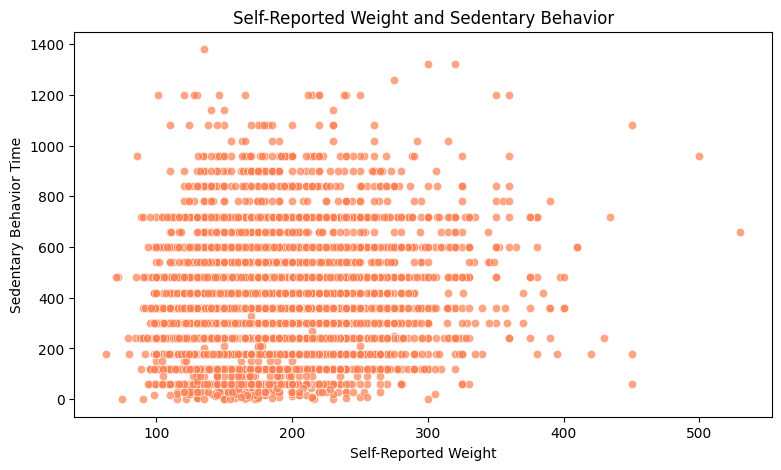

In [ ]:
# Create a data visualization for question 4

plt.figure(figsize=(9, 5))
sns.scatterplot(x=correlation_wt, y=correlation_sedentary, alpha=0.7, color='coral')
plt.title('Self-Reported Weight and Sedentary Behavior')
plt.xlabel('Self-Reported Weight')
plt.ylabel('Sedentary Behavior Time')
plt.show()

## **Question 5: Creative Analysis**

### `Do different age groups (age in years) have different sedentary behavior?`

*   `RIDAGEYR` (age in years) - Categorical, Independent Variable (IV)
*   `PAD680` (minutes of sedentary behavior) - Dependent Variable (DV)
*   Type of Statistical Test used: `1-way` **`ANOVA`** (compares the means of a continuous dependent variable and a single categorical independent variable)

- `Reason for choosing this question`: Analyzing sedentary behavior across different age groups provides valuable insights into how physical activity levels change with age. By understanding this behavior, we can take the necessary steps to prevent, promote, and improve healthier lifestyle choices. As we all know, one of the risk factors for many health illnesses is related to a sedentary lifestyle, making this analysis would be highly relevant and capable of greatly impacting the general public.

###  **Answer:**

#### There is **no statistically significant** difference in the minutes of sedentary behavior between different age groups. Given the p-value is `>0.05`, it fails to reject the null hypothesis (no significant difference between groups), in reference to Professor Hants' **Inferential Statistics** powerpoint, found in slide 31.

*  **1-Way ANOVA Test Statistic**: `0.11255241591314752`
*  **p-value**: `0.8935528425095732`


## **Analysis:**

In [151]:
import pandas as pd
from scipy.stats import f_oneway

# Retrieve the applicable values/columns

demographics = demographics[['SEQN', 'RIDAGEYR']]
p_activity = p_activity[['SEQN', 'PAD680']]
print(demographics)
print(p_activity)

# Merge the two datasets based on SEQN
merged_data = pd.merge(demographics, p_activity, on='SEQN')

# Create a new data frame (age group)

bins = [0, 30, 60, 80]
labels = ['Young', 'Middle-aged', 'Older']
merged_data['AgeGroup'] = pd.cut(data['RIDAGEYR'], bins=bins, labels=labels, right=False)


# Drop rows with missing values in the key variables (age in years & minutes of sedentary behavior)

merged_data = merged_data.dropna(subset=['AgeGroup', 'PAD680'])

# Group the data

groups = merged_data.groupby('AgeGroup')['PAD680'].apply(list)
print(groups)

# Perform 1-way ANOVA

stat, p_value = f_oneway(*groups)
print(f"1-Way ANOVA Test Statistic: {stat}, p-value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("There is no significant difference of sedentary behavior between different age groups.")
else:
    print("There is a significant difference of sedentary behavior between different age groups.")

           SEQN  RIDAGEYR
0      130378.0      43.0
1      130379.0      66.0
2      130380.0      44.0
3      130381.0       5.0
4      130382.0       2.0
...         ...       ...
11928  142306.0       9.0
11929  142307.0      49.0
11930  142308.0      50.0
11931  142309.0      40.0
11932  142310.0      80.0

[11933 rows x 2 columns]
          SEQN  PAD680
0     130378.0   360.0
1     130379.0   480.0
2     130380.0   240.0
3     130384.0    60.0
4     130385.0   180.0
...        ...     ...
8148  142305.0   480.0
8149  142307.0   480.0
8150  142308.0   600.0
8151  142309.0   240.0
8152  142310.0   360.0

[8080 rows x 2 columns]
AgeGroup
Young          [240.0, 120.0, 60.0, 420.0, 240.0, 360.0, 660....
Middle-aged    [360.0, 240.0, 720.0, 300.0, 720.0, 420.0, 240...
Older          [480.0, 300.0, 360.0, 960.0, 840.0, 300.0, 360...
Name: PAD680, dtype: object
1-Way ANOVA Test Statistic: 0.11255241591314752, p-value: 0.8935528425095732
There is no significant difference of sedentary beha

<ipython-input-151-eef7d819dfab>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = merged_data.groupby('AgeGroup')['PAD680'].apply(list)


<ipython-input-152-6ac2df9c3c88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(x='AgeGroup', y='PAD680', data=merged_data, palette="Set2")


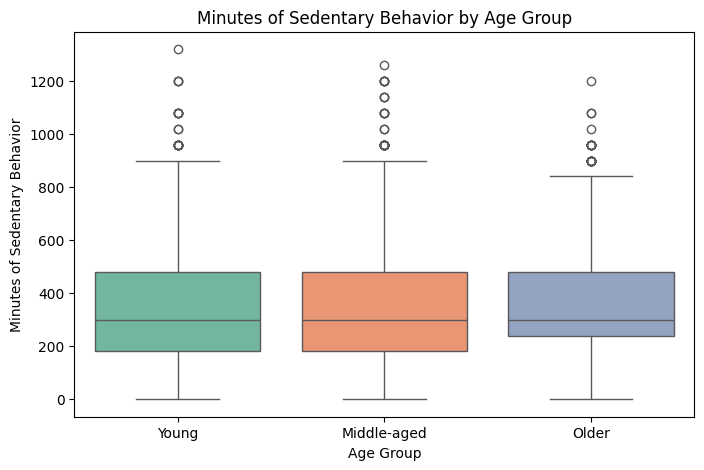

In [152]:
# Create a data visualization for question 5

plt.figure(figsize=(8, 5))
box = sns.boxplot(x='AgeGroup', y='PAD680', data=merged_data, palette="Set2")
plt.title('Minutes of Sedentary Behavior by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Minutes of Sedentary Behavior')
plt.show()